# Environment

## Set up the working environment by Installing the packages needed

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


## IMPORTS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from catboost import CatBoostClassifier
import plotly.express as px
import random
from sklearn.model_selection import GridSearchCV
random.seed(0)

In [ ]:
from tensorflow import keras
from keras.layers import

# Data Collection

In [ ]:
names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
         'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class',"noname"]

In [ ]:
# Parsing the .arff data into a pandas dataframe
data = []
with open('chronic_kidney_disease.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))
data = data[29:]

df = pd.DataFrame(data, columns=names)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.noname.value_counts()

In [ ]:
df[df.noname == '']

In [ ]:
df[df.noname == 'notckd']

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,class,noname
369,75,70,1.020,0,0,normal,normal,notpresent,notpresent,107,...,10300,4.8,no,,no,no,good,no,no,notckd


In [ ]:
#Viewing the data.arff and removing the tabulation we have in the 2 columns and the wrong spaces
#Removing the Last column since it contains useless values
df = df[names[:-1]]

### Exporting the data into a csv so we don't have to go through the data parsing process each

In [ ]:
df.to_csv("/content/Clean_Kidney.csv",index=False)

NameError: ignored

# Data Exploration

In [ ]:
#read the data from the exported csv
df = pd.read_csv("/content/kidney.csv",index_col=0)

In [ ]:
# Viewing the shape of the data
df.shape

(400, 25)

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

The data contains 2 classes ckd with 250 instance and notckd with 150 instance

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,44,93,50,3,6,4,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,105,130,251,259,363,317,323,339,250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

All the data parsed are in **object** format

Now we will try to

*   To make a list of all numerical columns using the data description file that we were provided with
*   Transform all those columns from object time to numerical (in this case float64)





In [ ]:
numerical = ["age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo",
             "pcv","wc","rc"]

In [ ]:
for num in numerical:
  df[num] = pd.to_numeric(df[num], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

Now we will view our categorical columns to check if the values are good or not

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has ['?' 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' '?'] values

pcc has ['notpresent' 'present' '?'] values

ba has ['notpresent' 'present' '?'] values

htn has ['yes' 'no' '?'] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' '?'] values

cad has ['no' 'yes' '\tno' '?'] values

appet has ['good' 'poor' '?'] values

pe has ['no' 'yes' '?'] values

ane has ['no' 'yes' '?'] values

class has ['ckd' 'notckd'] values



We noticed that since we parsed the file using .split by , some values contain tabs (\t) so we have to transform them

In [ ]:
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = 'ckd\t', value='ckd')

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has ['?' 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' '?'] values

pcc has ['notpresent' 'present' '?'] values

ba has ['notpresent' 'present' '?'] values

htn has ['yes' 'no' '?'] values

dm has ['yes' 'no' '?'] values

cad has ['no' 'yes' '?'] values

appet has ['good' 'poor' '?'] values

pe has ['no' 'yes' '?'] values

ane has ['no' 'yes' '?'] values

class has ['ckd' 'notckd'] values



# Data Visualisation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

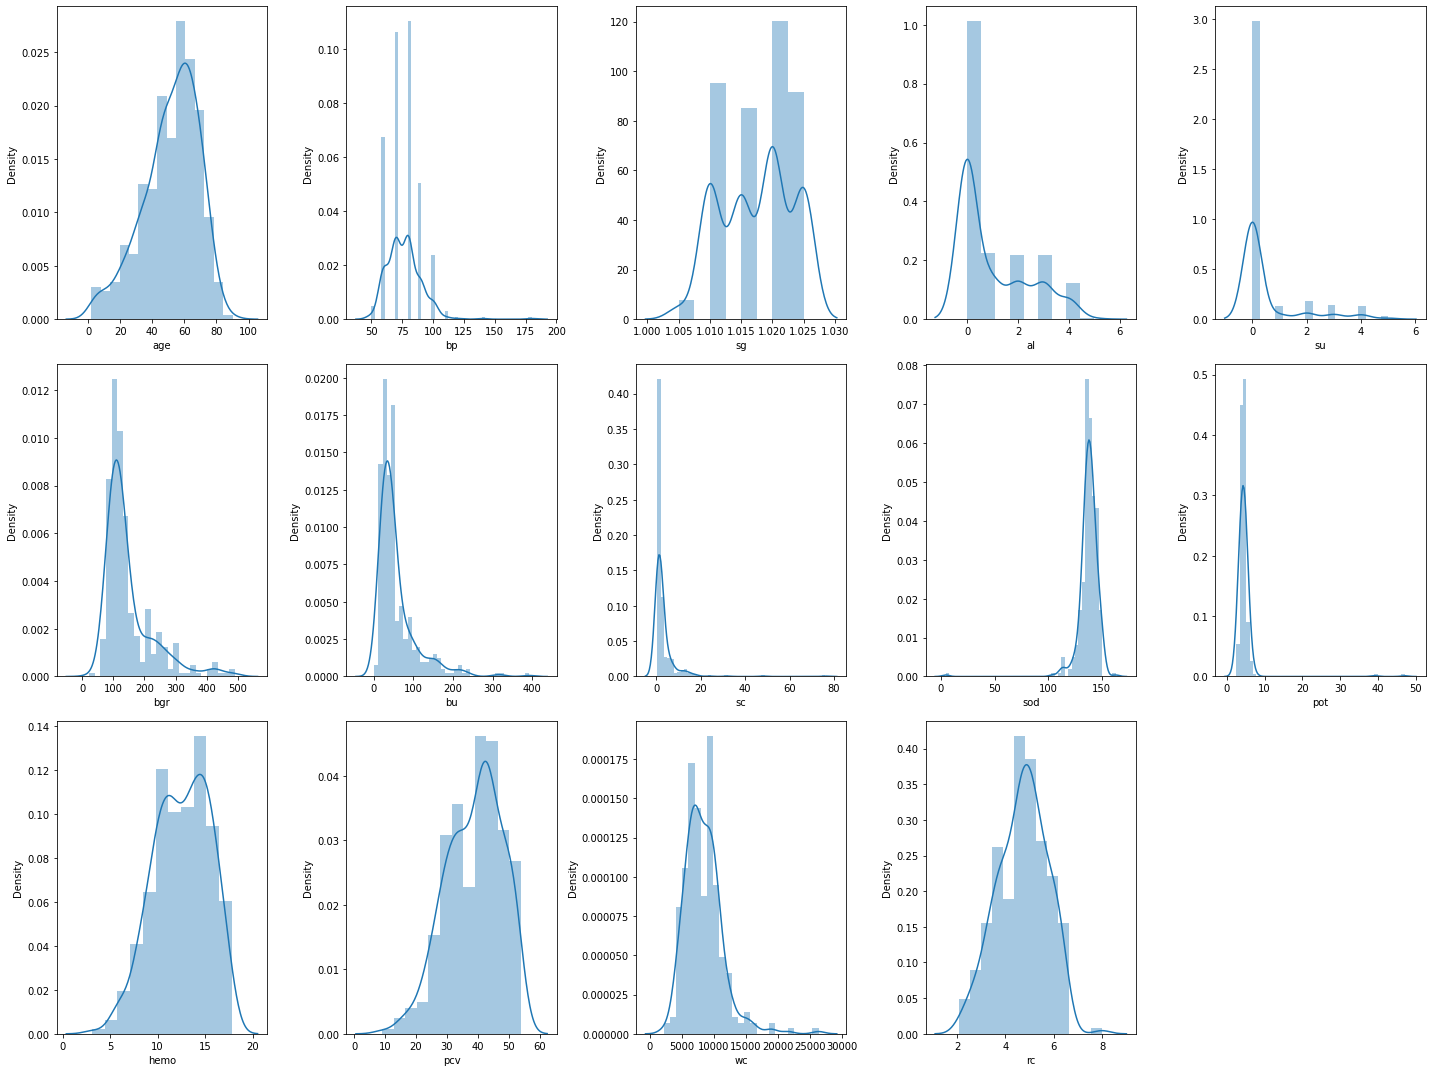

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
new_df = df.copy()
for col in names[:-1]:
  print(f"col : {col} has {len(df[df[col]=='?'])} null value")
  new_df[col] = df[col].apply(lambda x: None if x=="?" else x)

col : age has 0 null value
col : bp has 0 null value
col : sg has 0 null value
col : al has 0 null value
col : su has 0 null value
col : rbc has 152 null value
col : pc has 65 null value
col : pcc has 4 null value
col : ba has 4 null value
col : bgr has 0 null value
col : bu has 0 null value
col : sc has 0 null value
col : sod has 0 null value
col : pot has 0 null value
col : hemo has 0 null value
col : pcv has 0 null value
col : wc has 0 null value
col : rc has 0 null value
col : htn has 2 null value
col : dm has 2 null value
col : cad has 2 null value
col : appet has 1 null value
col : pe has 1 null value
col : ane has 1 null value
col : class has 0 null value


In [ ]:
new_df[num_cols].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

In [ ]:
df['age'].mode()

0    60.0
dtype: float64

In [ ]:
def random_value_imputation(feature, df):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature, df):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
for col in num_cols:
    random_value_imputation(col, new_df)

In [ ]:
new_df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [ ]:
new_df[cat_cols].isnull().sum()

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [ ]:
random_value_imputation('rbc', new_df)
random_value_imputation('pc', new_df)

for col in cat_cols:
    impute_mode(col, new_df)

In [ ]:
df = new_df

In [ ]:
cat_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [ ]:
df[cat_cols].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

class has 2 categories



#checking for outliers

In [ ]:
fig = px.box(df, y="age")
fig.show()

In [ ]:
fig = px.box(df, y="al")
fig.show()

In [ ]:
fig = px.box(df, y="bgr")
fig.show()

In [ ]:
#df = df[df.bgr<=246]

In [ ]:
fig = px.box(df, y="hemo")
fig.show()

In [ ]:
fig = px.box(df, y="pcv")
fig.show()

In [ ]:
fig = px.box(df, y="rc")
fig.show()

Min-max Normalization

In [ ]:
normalized_df = df.copy()
normalized_df[num_cols] =(df[num_cols]-df[num_cols].min())/(df[num_cols].max()-df[num_cols].min())
df = normalized_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.777778,0.231405,0.525424,1,1,0,0,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.705128,...,0.644444,0.157025,0.440678,0,0,0,0,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.488889,0.219008,0.542373,0,1,0,1,0,1,0
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.511111,0.185950,0.305085,1,0,0,1,1,1,0
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.577778,0.210744,0.423729,0,0,0,0,0,0,0


In [ ]:
#df = df.drop(columns="class_idx")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.777778,0.231405,0.525424,1,1,0,0,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.705128,...,0.644444,0.157025,0.440678,0,0,0,0,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.488889,0.219008,0.542373,0,1,0,1,0,1,0
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.511111,0.185950,0.305085,1,0,0,1,1,1,0
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.577778,0.210744,0.423729,0,0,0,0,0,0,0


In [ ]:
df['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

# Modeling

In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(300, 100, 300, 100)

In [ ]:
classes = ["ckd", "not ckd"]

In [ ]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
250,0.431818,0.230769,1.00,0.0,0.0,1,1,0,0,0.252137,...,0.809524,0.866667,0.338843,0.406780,0,0,0,0,0,0
63,0.500000,0.153846,0.50,0.2,0.0,0,1,0,0,0.273504,...,0.299320,0.400000,0.314050,0.491525,0,0,0,0,0,1
312,0.886364,0.153846,0.75,0.0,0.0,1,1,0,0,0.188034,...,0.829932,0.866667,0.169421,0.677966,0,0,0,0,0,0
159,0.647727,0.230769,0.25,0.2,0.0,0,1,0,0,0.600427,...,0.496599,0.577778,0.359504,0.372881,0,1,0,1,0,0
283,0.659091,0.153846,0.75,0.0,0.0,1,1,0,0,0.102564,...,0.904762,0.755556,0.355372,0.610169,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.465909,0.230769,1.00,0.0,0.0,1,1,0,0,0.230769,...,0.870748,0.800000,0.231405,0.406780,0,0,0,0,0,0
192,0.500000,0.461538,0.50,0.0,0.0,0,1,0,0,0.230769,...,0.945578,0.666667,0.219008,0.491525,0,0,0,0,0,0
117,0.545455,0.153846,0.75,0.0,0.0,1,1,0,0,0.420940,...,0.639456,0.622222,0.314050,0.389831,0,0,0,0,0,0
47,0.102273,0.230769,0.25,0.6,0.0,1,1,0,0,0.164530,...,0.809524,0.800000,0.264463,0.271186,0,0,0,0,0,0


In [ ]:
X_train.shape

(300, 24)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class Model():
    def __init__(self, model, model_name, X_train, y_train, X_test, y_test, fitted = False):
        print(f'******************~ {model_name} ~**********************\n')
        super().__init__()
        self.model=model
        if fitted == False:
          self.model.fit(X_train, y_train)
        self.model_name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred_train = self.model.predict(self.X_train)
        self.y_pred = self.model.predict(self.X_test)
    def accuracy(self):
        score = accuracy_score(self.y_test, self.y_pred)
        return score
    def summary(self):
        print(f"Training Accuracy of {self.model_name} is {accuracy_score(y_train, self.y_pred_train)}")
        print(f"Test cross-validation Accuracy of {self.model_name} is {self.accuracy()} \n")
        print(f"Classification Report :- \n {classification_report(self.y_test, self.y_pred)}")
    def confusion_matrix(self):
        print(f"Confusion Matrix :- \n")
        cm = confusion_matrix(self.y_test, self.y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
        fig, ax = plt.subplots(figsize=(10,10))
        cm_display.plot(ax=ax, cmap=plt.cm.Blues)

## MODELS WITHOUT SMOTE

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense, Input
from keras.losses import MSE
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
plot_losses = PlotLosses()

In [ ]:
model = Sequential([
    Dense(units=256,input_shape = (24,),activation="relu"),
    keras.layers.Dropout(0.3),
    Dense(units=20,activation="relu"),
    keras.layers.Dropout(0.3),
    Dense(units=1,activation="hard_sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6400      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


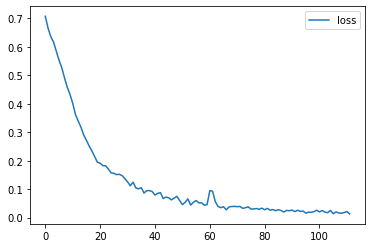

2/2 - 0s - loss: 0.0129 - accuracy: 0.9367 - val_loss: 0.0353 - val_accuracy: 0.9600 - 195ms/epoch - 97ms/step
Epoch 112: early stopping


In [ ]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics=[keras.metrics.Accuracy()]
)
filepath = '/model/m.epoch{epoch:02d}-l{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=2,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss', patience=30, verbose=2)
history = model.fit(X_train, y_train, epochs=200, batch_size=200,callbacks=[es,checkpoint,plot_losses], shuffle=True,validation_data=(X_test, y_test),verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9600
Test loss: 0.035300545394420624
Test accuracy: 0.9599999785423279


### KNN

Text(0, 0.5, 'Score')

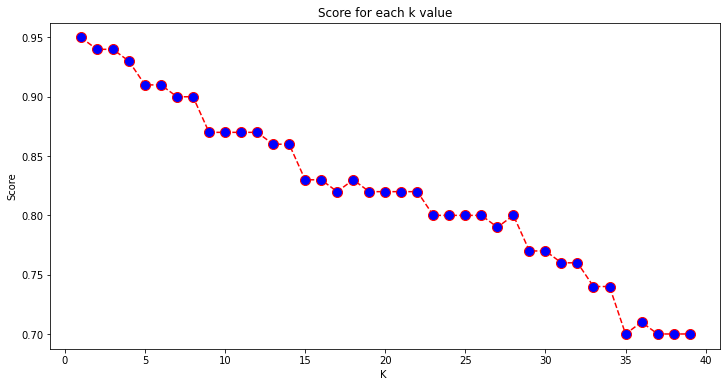

In [ ]:
score = []
# Calculate score for k between 1 and 40

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    scores = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')
    score.append(np.mean(scores))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

******************~ KNN ~**********************

Training Accuracy of KNN is 1.0
Test cross-validation Accuracy of KNN is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix :- 



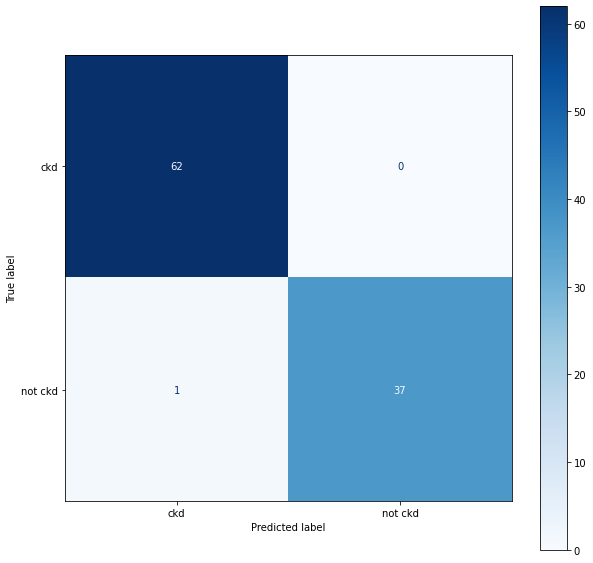

In [ ]:
#KNN
md = Model(KNeighborsClassifier(2,metric='manhattan'),"KNN",X_train,y_train,X_test,y_test)
knn_acc = md.accuracy()
md.summary()
md.confusion_matrix()

In [ ]:
param_grid = {'n_neighbors': [1,2,3,5, 10, 15, 20],
              'metric': ['euclidean', 'manhattan']}
gs=GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
gs
gs_result=gs.fit(X,y)
gs_result.best_score_, gs_result.best_params_

(0.9824999999999999, {'metric': 'manhattan', 'n_neighbors': 2})

### MLPClassifier

******************~ MLPClassifier ~**********************

Training Accuracy of MLPClassifier is 1.0
Test cross-validation Accuracy of MLPClassifier is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix :- 



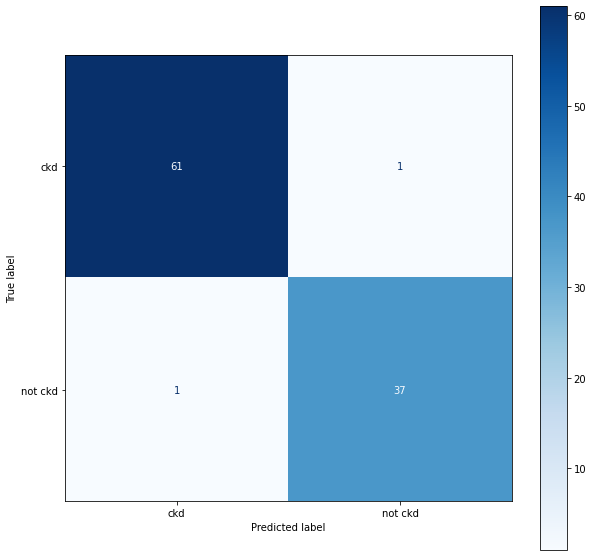

In [ ]:
from sklearn.neural_network import MLPClassifier

md = Model(MLPClassifier(random_state=1, max_iter=1000),"MLPClassifier",X_train,y_train,X_test,y_test)
mlp_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### HistGradientBoostingClassifier

******************~ HistGradientBoostingClassifier ~**********************

Training Accuracy of HistGradientBoostingClassifier is 1.0
Test cross-validation Accuracy of HistGradientBoostingClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



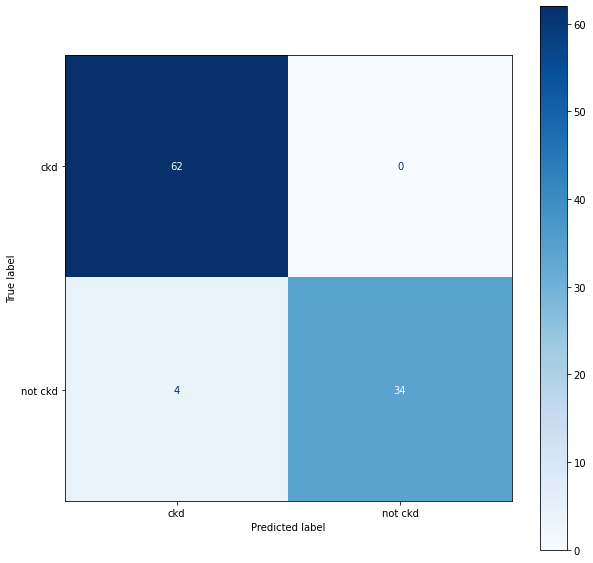

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
md = Model(HistGradientBoostingClassifier(),"HistGradientBoostingClassifier",X_train,y_train,X_test,y_test)
hgd_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### stacking classifier

******************~ StackingClassifier ~**********************

Training Accuracy of StackingClassifier is 1.0
Test cross-validation Accuracy of StackingClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.97      0.92      0.95        38

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



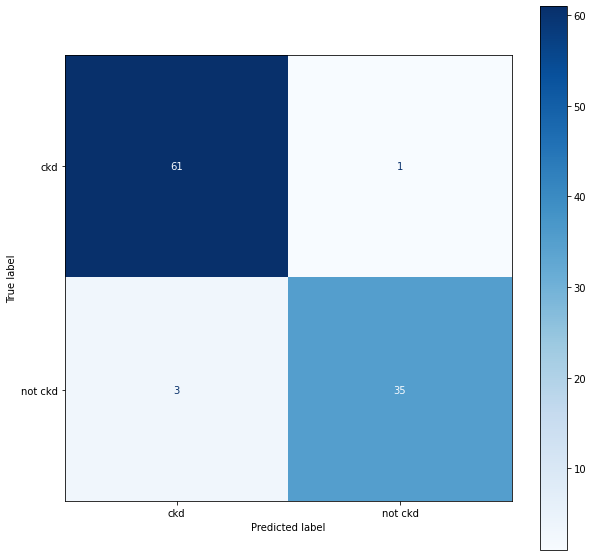

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
md = Model(sc,"StackingClassifier",X_train,y_train,X_test,y_test)
sc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### LogisticRegression

******************~ LogisticRegression ~**********************

Training Accuracy of LogisticRegression is 0.9966666666666667
Test cross-validation Accuracy of LogisticRegression is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix :- 



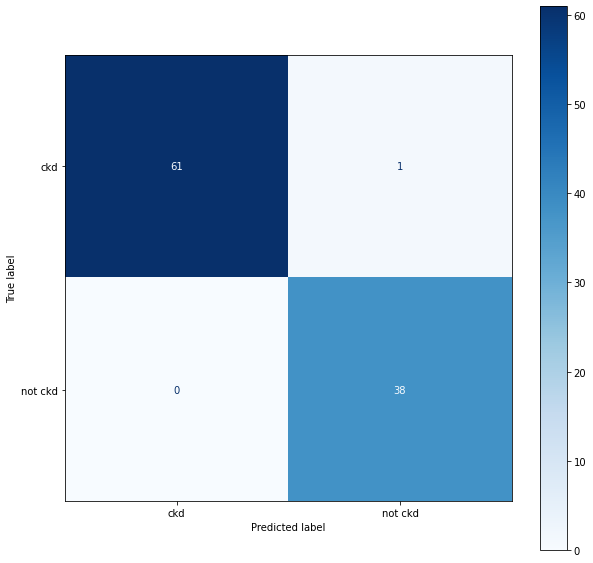

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

reg = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())

md = Model(pipe,"LogisticRegression",X_train,y_train,X_test,y_test)
reg_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### SVM

******************~ SVM ~**********************

Training Accuracy of SVM is 0.9833333333333333
Test cross-validation Accuracy of SVM is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



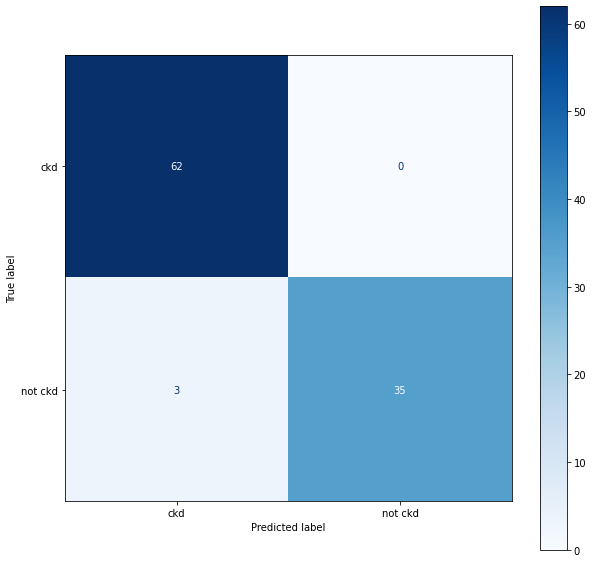

In [ ]:
#svm
from sklearn.svm import SVC
svc = SVC()

md = Model(svc,"SVM",X_train,y_train,X_test,y_test)
svc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### Diff Kernal SVM

******************~ SVM Linear ~**********************

Training Accuracy of SVM Linear is 0.99
Test cross-validation Accuracy of SVM Linear is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



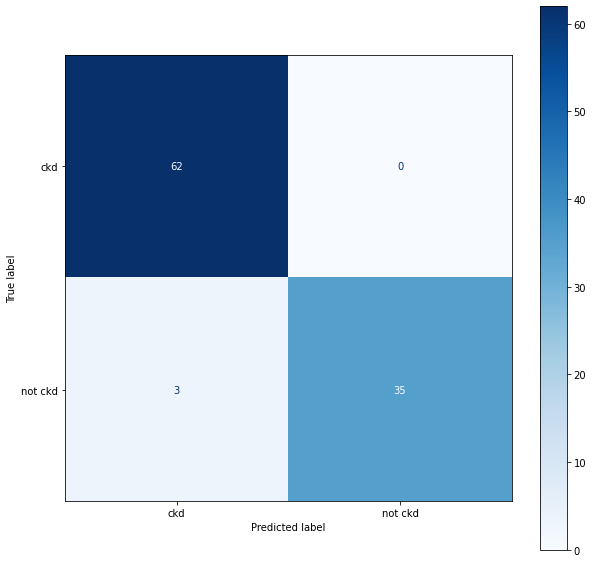

In [ ]:
svm = SVC(kernel="linear")
md = Model(svm,"SVM Linear",X_train,y_train,X_test,y_test)
svl_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Polykernel ~**********************

Training Accuracy of SVM Polykernel is 0.9933333333333333
Test cross-validation Accuracy of SVM Polykernel is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



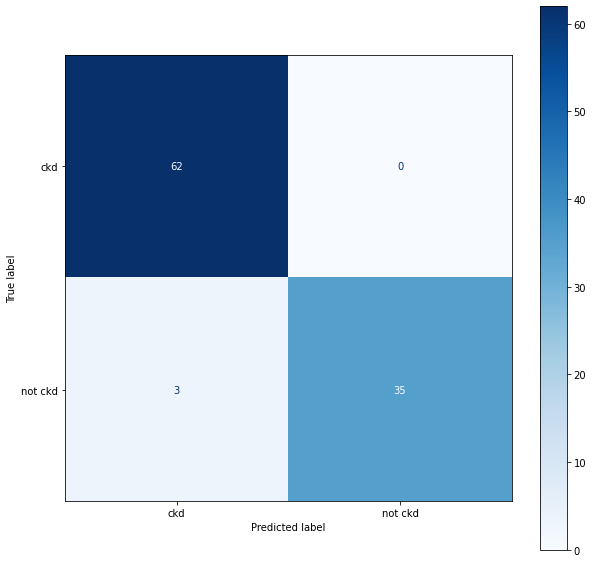

In [ ]:
svm = SVC(kernel="poly")
md = Model(svm,"SVM Polykernel",X_train,y_train,X_test,y_test)
svp_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Sigmoid kernel ~**********************

Training Accuracy of SVM Sigmoid kernel is 0.87
Test cross-validation Accuracy of SVM Sigmoid kernel is 0.86 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        62
           1       0.73      1.00      0.84        38

    accuracy                           0.86       100
   macro avg       0.87      0.89      0.86       100
weighted avg       0.90      0.86      0.86       100

Confusion Matrix :- 



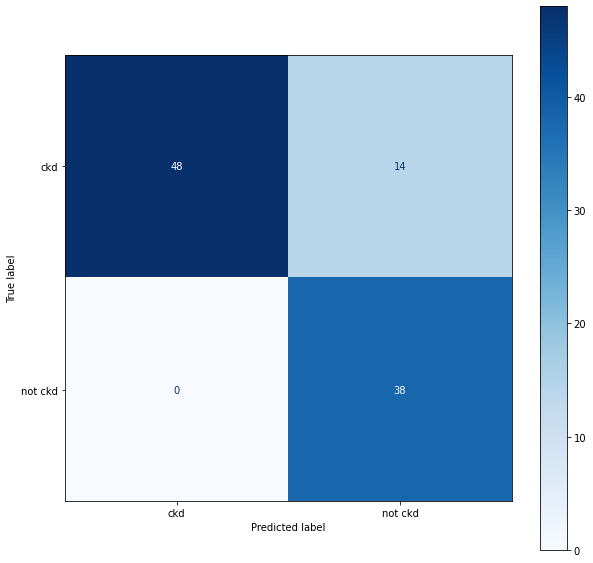

In [ ]:
svm = SVC(kernel="sigmoid")
md = Model(svm,"SVM Sigmoid kernel",X_train,y_train,X_test,y_test)
svs_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Gaussian RBF ~**********************

Training Accuracy of SVM Gaussian RBF is 0.9833333333333333
Test cross-validation Accuracy of SVM Gaussian RBF is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



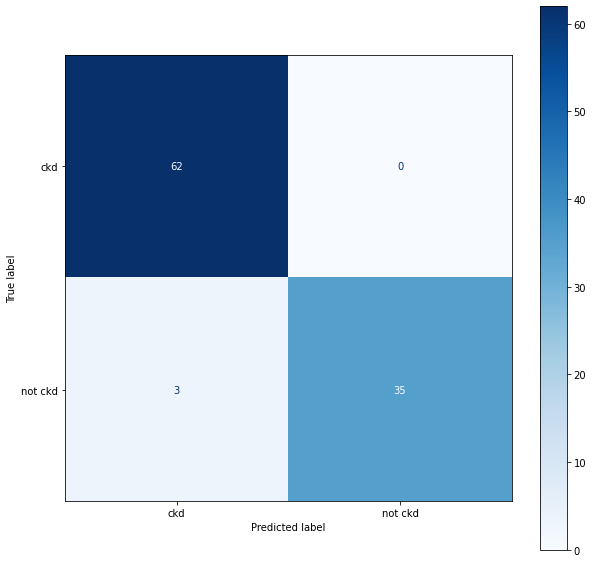

In [ ]:
svm = SVC(kernel="rbf")
md = Model(svm,"SVM Gaussian RBF",X_train,y_train,X_test,y_test)
svr_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### GaussianNB

******************~ GaussianNB ~**********************

Training Accuracy of GaussianNB is 0.9566666666666667
Test cross-validation Accuracy of GaussianNB is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.95      1.00      0.97        38

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix :- 



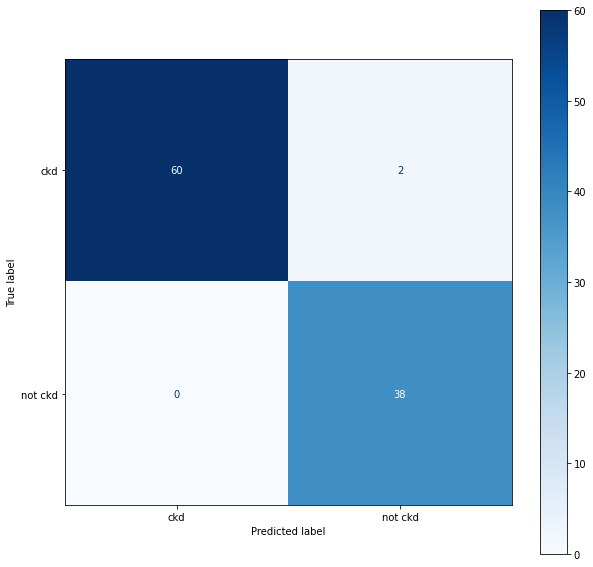

In [ ]:
from sklearn.naive_bayes import GaussianNB

md = Model(GaussianNB(),"GaussianNB",X_train,y_train,X_test,y_test)
gnb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### DecisionTreeClassifier

******************~ DecisionTreeClassifier ~**********************

Training Accuracy of DecisionTreeClassifier is 1.0
Test cross-validation Accuracy of DecisionTreeClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



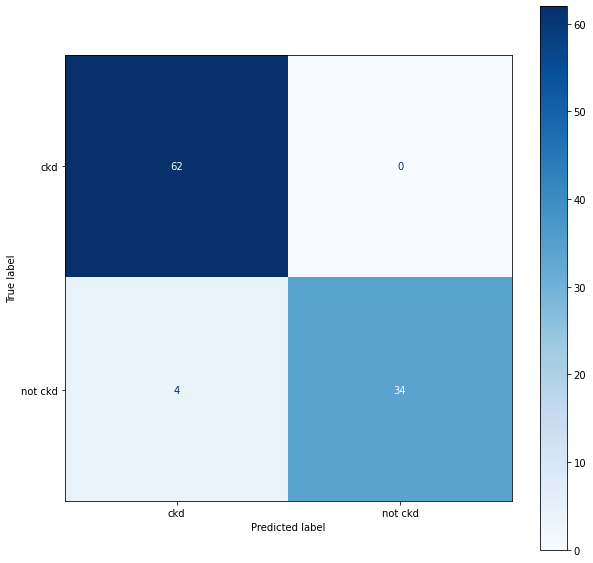

In [ ]:
from sklearn.tree import DecisionTreeClassifier

md = Model(DecisionTreeClassifier(),"DecisionTreeClassifier",X_train,y_train,X_test,y_test)
dtc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
0.9800000000000001


******************~ DecisionTreeClassifier with the best param ~**********************

Training Accuracy of DecisionTreeClassifier with the best param is 0.9733333333333334
Test cross-validation Accuracy of DecisionTreeClassifier with the best param is 0.94 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        62
           1       1.00      0.84      0.91        38

    accuracy                           0.94       100
   macro avg       0.96      0.92      0.93       100
weighted avg       0.95      0.94      0.94       100

Confusion Matrix :- 



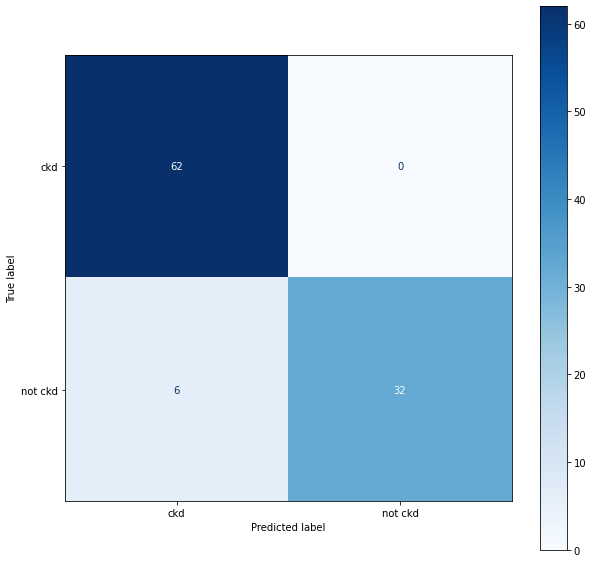

In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

md = Model(dtc,"DecisionTreeClassifier with the best param",X_train,y_train,X_test,y_test,fitted = True)
dtc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### RandomForestClassifier

******************~ RandomForestClassifier ~**********************

Training Accuracy of RandomForestClassifier is 1.0
Test cross-validation Accuracy of RandomForestClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



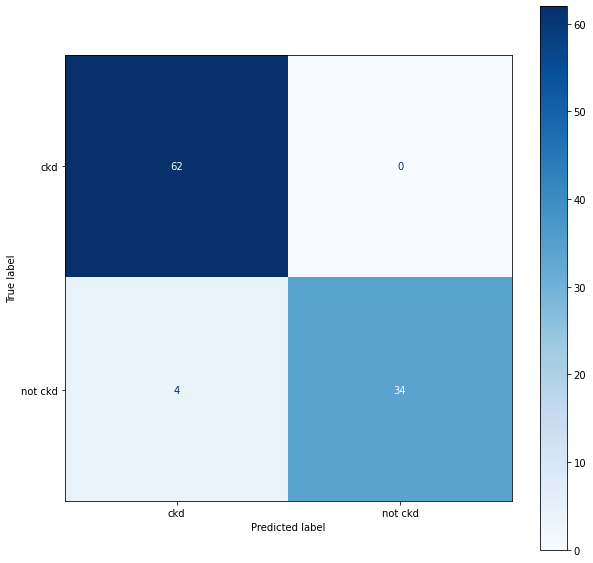

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

md = Model(rd_clf,"RandomForestClassifier",X_train,y_train,X_test,y_test)
rd_clf_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### AdaBoostClassifier

******************~ AdaBoostClassifier ~**********************

Training Accuracy of AdaBoostClassifier is 1.0
Test cross-validation Accuracy of AdaBoostClassifier is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix :- 



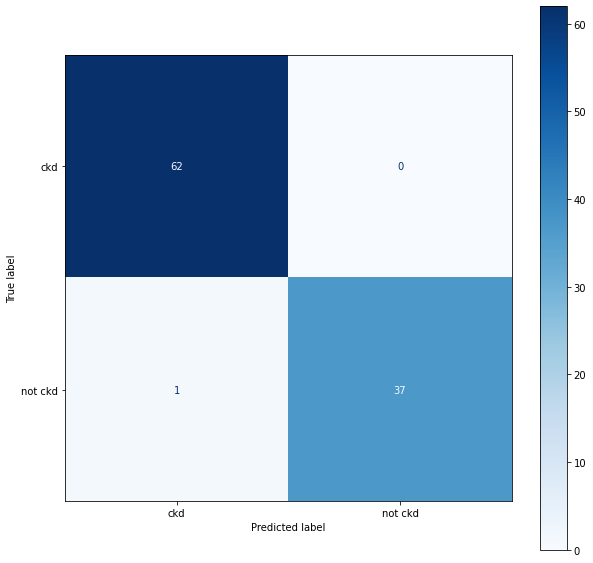

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

md = Model(ada,"AdaBoostClassifier",X_train,y_train,X_test,y_test)
ada_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### GradientBoostingClassifier

******************~ GradientBoostingClassifier ~**********************

Training Accuracy of GradientBoostingClassifier is 1.0
Test cross-validation Accuracy of GradientBoostingClassifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



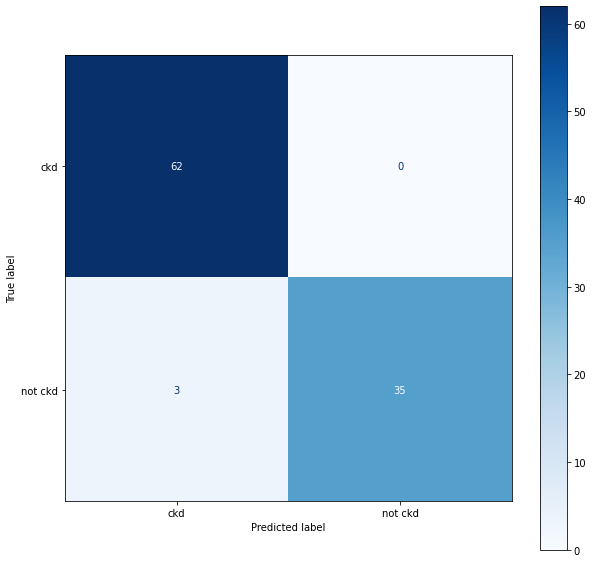

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()


md = Model(gb,"GradientBoostingClassifier",X_train,y_train,X_test,y_test)
gb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ GradientBoostingClassifier with param ~**********************

Training Accuracy of GradientBoostingClassifier with param is 1.0
Test cross-validation Accuracy of GradientBoostingClassifier with param is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



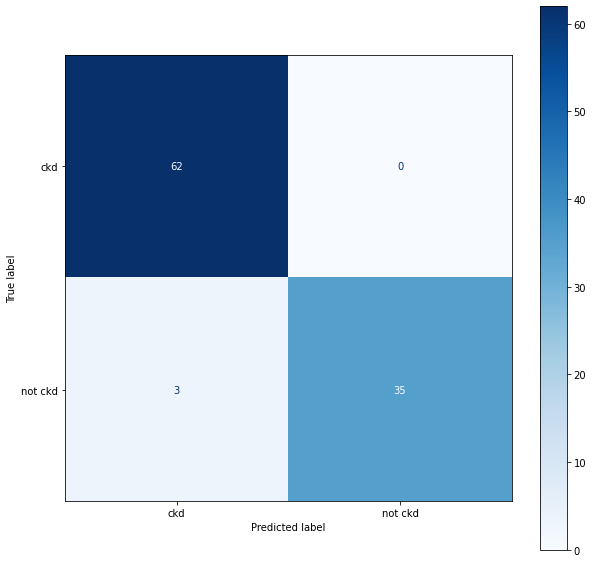

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)

md = Model(sgb,"GradientBoostingClassifier with param",X_train,y_train,X_test,y_test)
sgb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### XGBClassifier

******************~ xgboost ~**********************

Training Accuracy of xgboost is 1.0
Test cross-validation Accuracy of xgboost is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



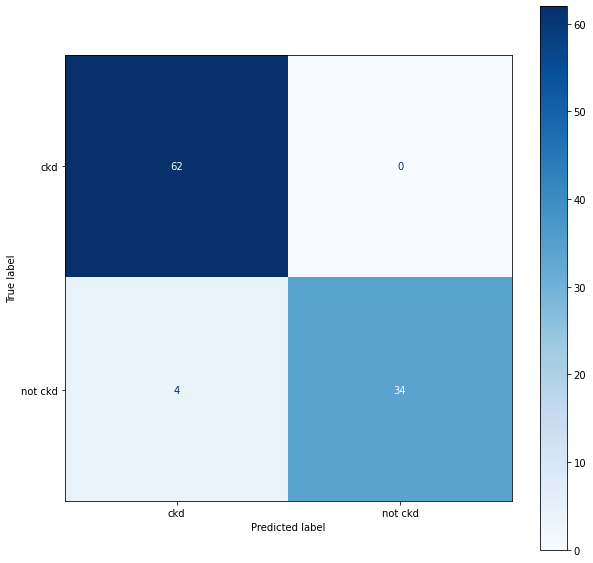

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 200)

# accuracy score, confusion matrix and classification report of xgboost

md = Model(xgb,"xgboost",X_train,y_train,X_test,y_test)
xgb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(iterations=15)
cat.fit(X_train, y_train)

Learning rate set to 0.289861
0:	learn: 0.3452987	total: 49.5ms	remaining: 692ms
1:	learn: 0.2246110	total: 52.6ms	remaining: 342ms
2:	learn: 0.1399062	total: 55ms	remaining: 220ms
3:	learn: 0.0945395	total: 57ms	remaining: 157ms
4:	learn: 0.0691953	total: 59.1ms	remaining: 118ms
5:	learn: 0.0561570	total: 61.2ms	remaining: 91.9ms
6:	learn: 0.0464337	total: 63.3ms	remaining: 72.4ms
7:	learn: 0.0365490	total: 65.4ms	remaining: 57.3ms
8:	learn: 0.0313229	total: 67.5ms	remaining: 45ms
9:	learn: 0.0254601	total: 69.6ms	remaining: 34.8ms
10:	learn: 0.0224213	total: 71.8ms	remaining: 26.1ms
11:	learn: 0.0196407	total: 74ms	remaining: 18.5ms
12:	learn: 0.0179018	total: 76ms	remaining: 11.7ms
13:	learn: 0.0156685	total: 78.1ms	remaining: 5.58ms
14:	learn: 0.0137551	total: 80.3ms	remaining: 0us


******************~ CatBoost ~**********************

Training Accuracy of CatBoost is 1.0
Test cross-validation Accuracy of CatBoost is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



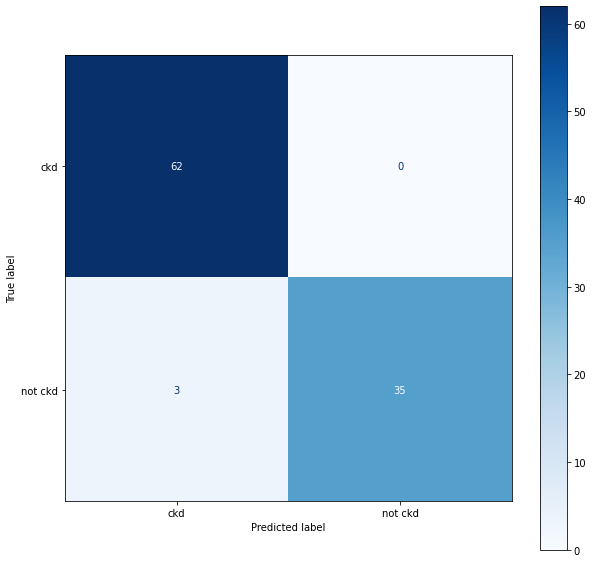

In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

md = Model(cat,"CatBoost",X_train,y_train,X_test,y_test,fitted=True)
cat_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### ExtraTreesClassifier

******************~ ExtraTreesClassifier ~**********************

Training Accuracy of ExtraTreesClassifier is 1.0
Test cross-validation Accuracy of ExtraTreesClassifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



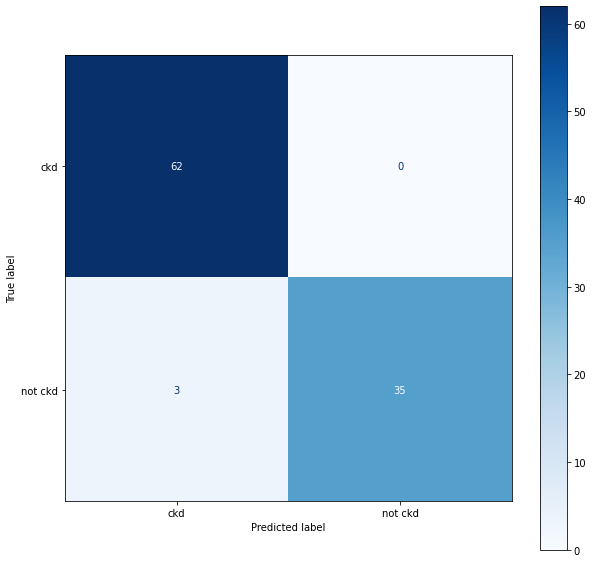

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
md = Model(etc,"ExtraTreesClassifier",X_train,y_train,X_test,y_test)
etc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### LGBMClassifier

******************~ ExtraTreesClassifier ~**********************

Training Accuracy of ExtraTreesClassifier is 1.0
Test cross-validation Accuracy of ExtraTreesClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



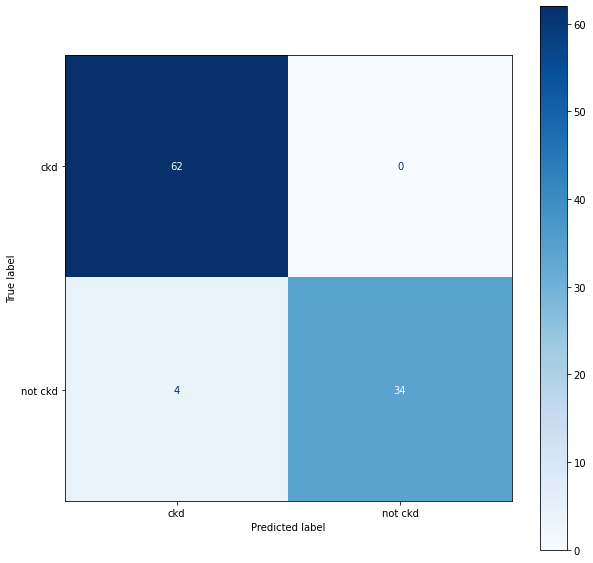

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.4)

# accuracy score, confusion matrix and classification report of lgbm classifier

md = Model(lgbm,"ExtraTreesClassifier",X_train,y_train,X_test,y_test)
lgbm_acc = md.accuracy()
md.summary()
md.confusion_matrix()

## Performance

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN',"LogisticRegression"  , "Support vector machine"  ,
               "SVM Sigmoid Kernel","SVM GaussianRBF","SVM Poly Kernel",
               "SVM Linear Kernel", "Gaussian Naive Bayes" , 'Decision Tree Classifier',
               'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
              'XgBoost', 'Cat Boost', 'Extra Trees Classifier','StackingClassifier','HistGradientBoostingClassifier',
               'MLPClassifier'],
    'Score' : [knn_acc, reg_acc, svc_acc,svs_acc,svr_acc,svp_acc,svl_acc, gnb_acc, dtc_acc, rd_clf_acc,
               ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc,sc_acc,
               hgd_acc,mlp_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,0.99
10,Ada Boost Classifier,0.99
1,LogisticRegression,0.99
7,Gaussian Naive Bayes,0.98
18,MLPClassifier,0.98
5,SVM Poly Kernel,0.97
6,SVM Linear Kernel,0.97
4,SVM GaussianRBF,0.97
2,Support vector machine,0.97
11,Gradient Boosting Classifier,0.97


In [ ]:
import plotly.express as px
models_sorted = models.sort_values(by = 'Score', ascending = True)
px.bar(data_frame = models_sorted, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

## MODELS WITH SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    188
0    188
Name: class, dtype: int64

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense, Input
from keras.losses import MSE
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential([
    Dense(units=256,input_shape = (24,),activation="relu"),
    keras.layers.Dropout(0.3),
    Dense(units=20,activation="relu"),
    keras.layers.Dropout(0.3),
    Dense(units=1,activation="hard_sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               6400      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 20)                5140      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


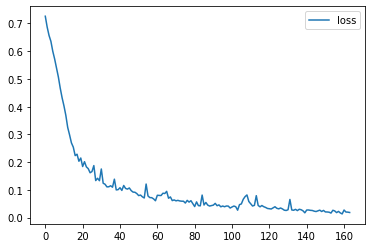

2/2 - 0s - loss: 0.0185 - accuracy: 0.9229 - val_loss: 0.0323 - val_accuracy: 0.9600 - 196ms/epoch - 98ms/step
Epoch 164: early stopping


In [ ]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics=[keras.metrics.Accuracy()]
)
filepath = 'm.epoch{epoch:02d}-l{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=2,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss', patience=30, verbose=2)
history = model.fit(X_train, y_train, epochs=200, batch_size=200,callbacks=[es,checkpoint,plot_losses], shuffle=True,validation_data=(X_test, y_test),verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9600
Test loss: 0.03229283168911934
Test accuracy: 0.9599999785423279


### KNN

******************~ KNN ~**********************

Training Accuracy of KNN is 0.9707446808510638
Test cross-validation Accuracy of KNN is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix :- 



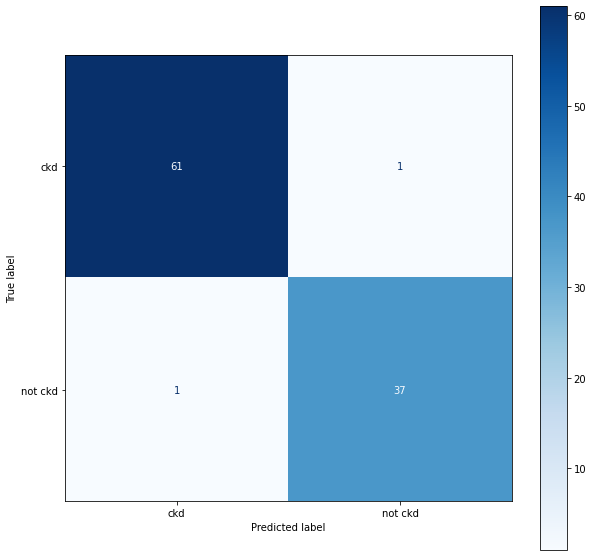

In [ ]:
#KNN
md = Model(KNeighborsClassifier(2),"KNN",X_train,y_train,X_test,y_test)
knn_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### MLPClassifier

******************~ MLPClassifier ~**********************

Training Accuracy of MLPClassifier is 0.9973404255319149
Test cross-validation Accuracy of MLPClassifier is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix :- 



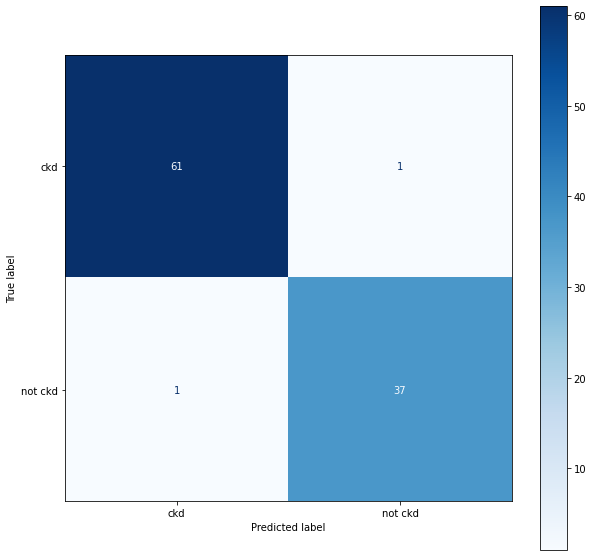

In [ ]:
from sklearn.neural_network import MLPClassifier

md = Model(MLPClassifier(random_state=1, max_iter=1000),"MLPClassifier",X_train,y_train,X_test,y_test)
mlp_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### HistGradientBoostingClassifier

******************~ HistGradientBoostingClassifier ~**********************

Training Accuracy of HistGradientBoostingClassifier is 1.0
Test cross-validation Accuracy of HistGradientBoostingClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



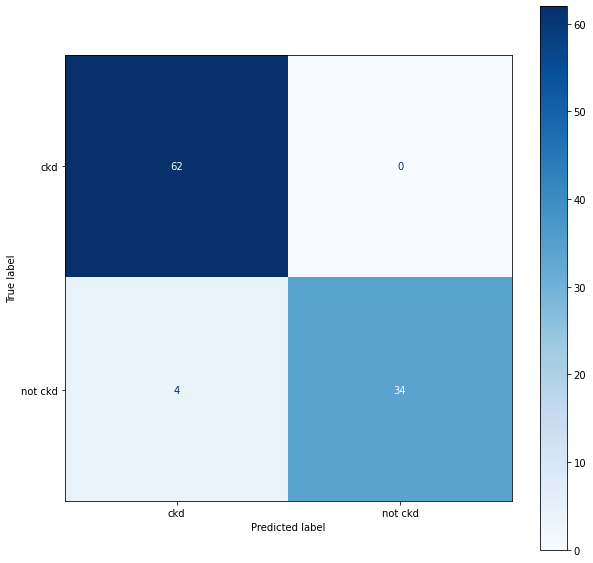

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
md = Model(HistGradientBoostingClassifier(),"HistGradientBoostingClassifier",X_train,y_train,X_test,y_test)
hgd_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### stacking classifier

******************~ StackingClassifier ~**********************

Training Accuracy of StackingClassifier is 1.0
Test cross-validation Accuracy of StackingClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.97      0.92      0.95        38

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



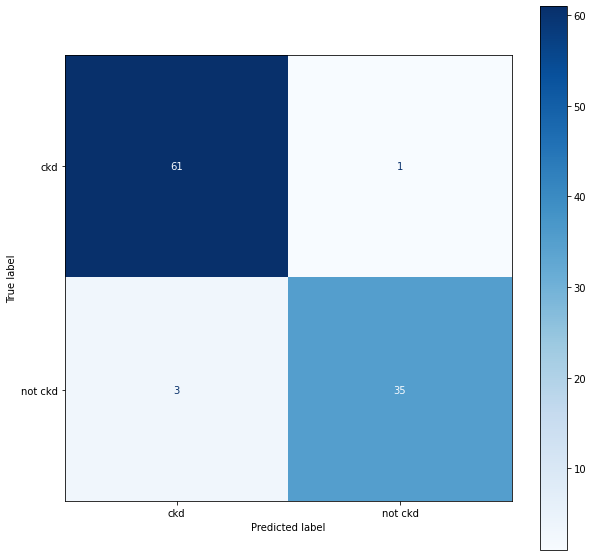

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
md = Model(sc,"StackingClassifier",X_train,y_train,X_test,y_test)
sc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### LogisticRegression

******************~ LogisticRegression ~**********************

Training Accuracy of LogisticRegression is 1.0
Test cross-validation Accuracy of LogisticRegression is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix :- 



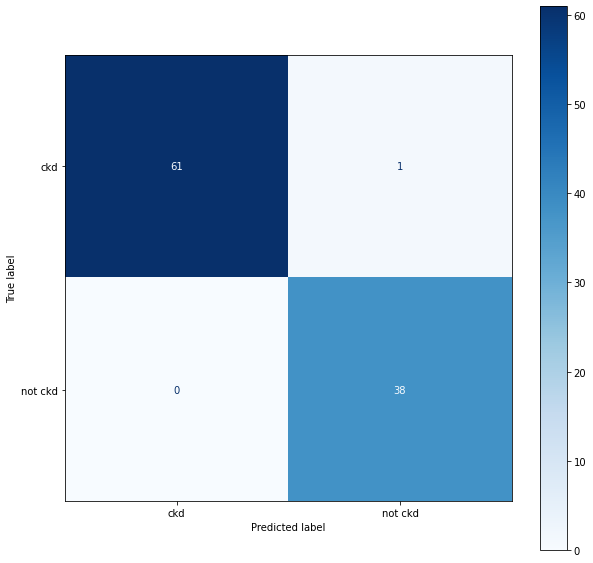

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

reg = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())

md = Model(pipe,"LogisticRegression",X_train,y_train,X_test,y_test)
reg_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### SVM

******************~ SVM ~**********************

Training Accuracy of SVM is 0.9893617021276596
Test cross-validation Accuracy of SVM is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



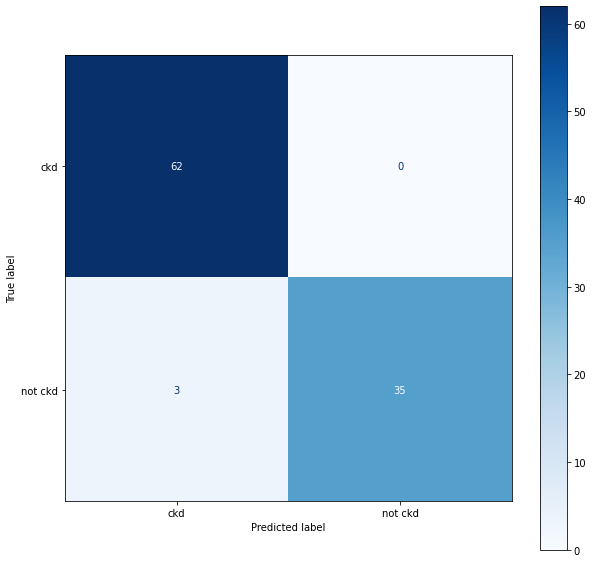

In [ ]:
#svm
from sklearn.svm import SVC
svc = SVC()

md = Model(svc,"SVM",X_train,y_train,X_test,y_test)
svc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### Diff Kernal SVM

******************~ SVM Linear ~**********************

Training Accuracy of SVM Linear is 0.9920212765957447
Test cross-validation Accuracy of SVM Linear is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



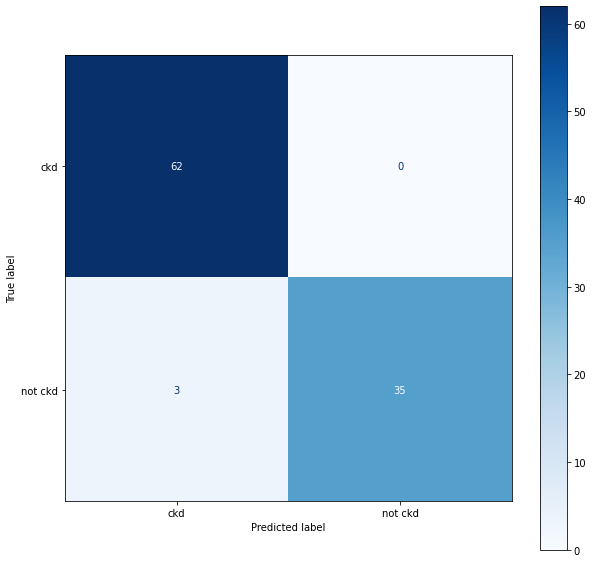

In [ ]:
svm = SVC(kernel="linear")
md = Model(svm,"SVM Linear",X_train,y_train,X_test,y_test)
svl_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Polykernel ~**********************

Training Accuracy of SVM Polykernel is 0.9867021276595744
Test cross-validation Accuracy of SVM Polykernel is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



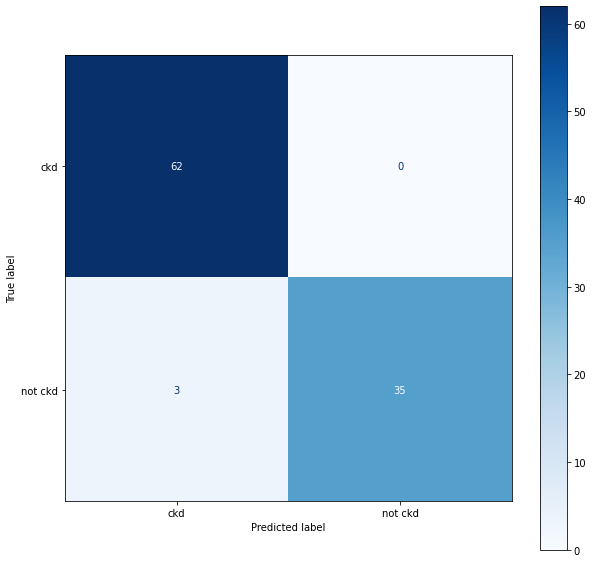

In [ ]:
svm = SVC(kernel="poly")
md = Model(svm,"SVM Polykernel",X_train,y_train,X_test,y_test)
svp_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Sigmoid kernel ~**********************

Training Accuracy of SVM Sigmoid kernel is 0.8670212765957447
Test cross-validation Accuracy of SVM Sigmoid kernel is 0.83 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        62
           1       0.69      1.00      0.82        38

    accuracy                           0.83       100
   macro avg       0.85      0.86      0.83       100
weighted avg       0.88      0.83      0.83       100

Confusion Matrix :- 



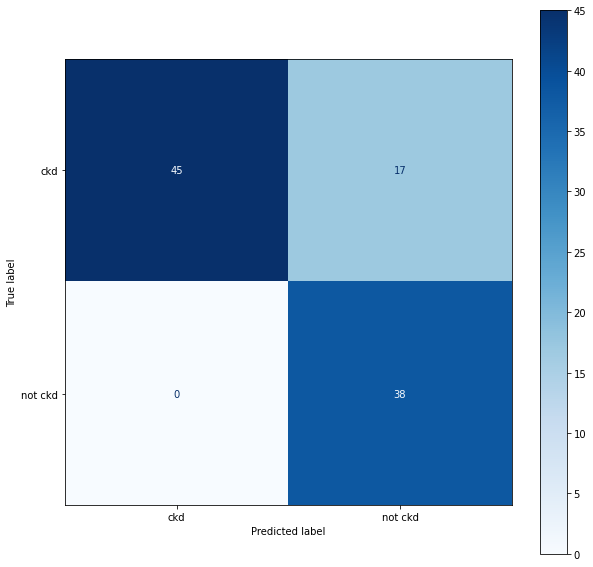

In [ ]:
svm = SVC(kernel="sigmoid")
md = Model(svm,"SVM Sigmoid kernel",X_train,y_train,X_test,y_test)
svs_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ SVM Gaussian RBF ~**********************

Training Accuracy of SVM Gaussian RBF is 0.9893617021276596
Test cross-validation Accuracy of SVM Gaussian RBF is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



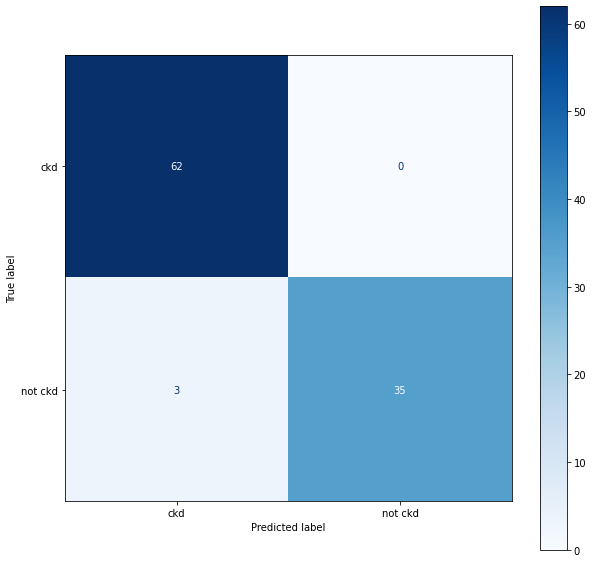

In [ ]:
svm = SVC(kernel="rbf")
md = Model(svm,"SVM Gaussian RBF",X_train,y_train,X_test,y_test)
svr_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### GaussianNB

******************~ GaussianNB ~**********************

Training Accuracy of GaussianNB is 0.9654255319148937
Test cross-validation Accuracy of GaussianNB is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.95      1.00      0.97        38

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix :- 



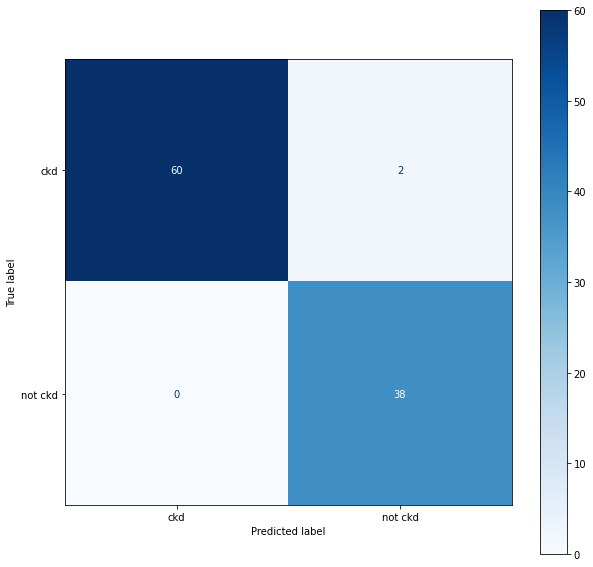

In [ ]:
from sklearn.naive_bayes import GaussianNB

md = Model(GaussianNB(),"GaussianNB",X_train,y_train,X_test,y_test)
gnb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### DecisionTreeClassifier

******************~ DecisionTreeClassifier ~**********************

Training Accuracy of DecisionTreeClassifier is 1.0
Test cross-validation Accuracy of DecisionTreeClassifier is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.97      0.89      0.93        38

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix :- 



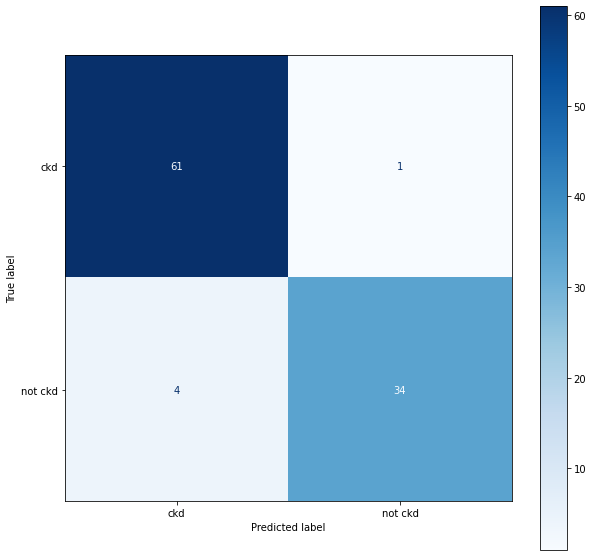

In [ ]:
from sklearn.tree import DecisionTreeClassifier

md = Model(DecisionTreeClassifier(),"DecisionTreeClassifier",X_train,y_train,X_test,y_test)
dtc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.9761403508771929


******************~ DecisionTreeClassifier with the best param ~**********************

Training Accuracy of DecisionTreeClassifier with the best param is 0.976063829787234
Test cross-validation Accuracy of DecisionTreeClassifier with the best param is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



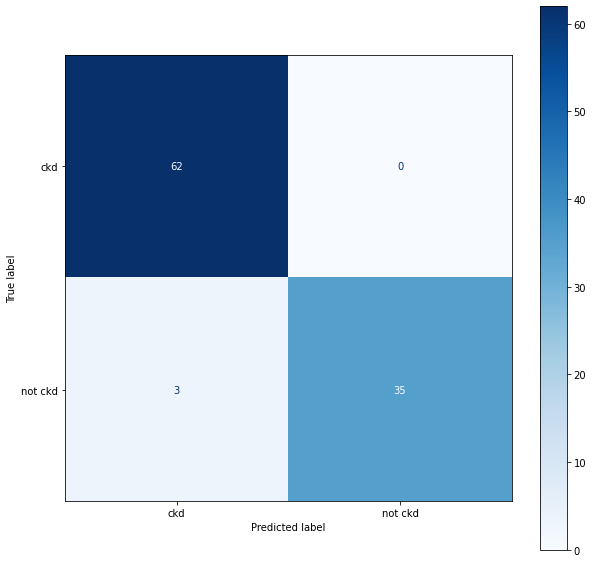

In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

md = Model(dtc,"DecisionTreeClassifier with the best param",X_train,y_train,X_test,y_test,fitted = True)
dtc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### RandomForestClassifier

******************~ RandomForestClassifier ~**********************

Training Accuracy of RandomForestClassifier is 1.0
Test cross-validation Accuracy of RandomForestClassifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



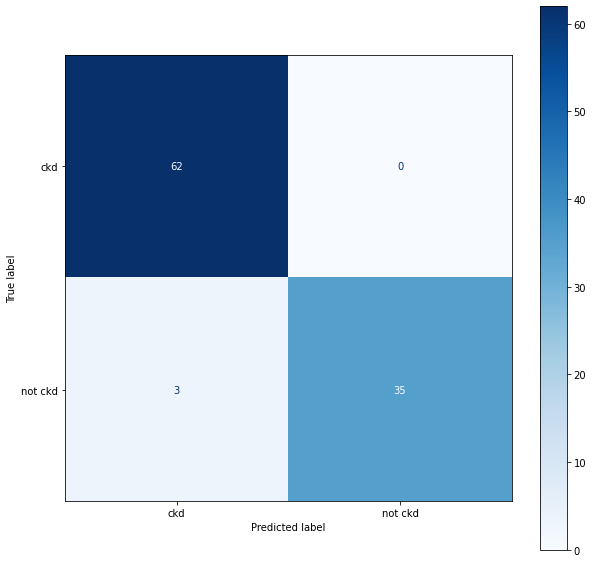

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

md = Model(rd_clf,"RandomForestClassifier",X_train,y_train,X_test,y_test)
rd_clf_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### AdaBoostClassifier

******************~ AdaBoostClassifier ~**********************

Training Accuracy of AdaBoostClassifier is 1.0
Test cross-validation Accuracy of AdaBoostClassifier is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix :- 



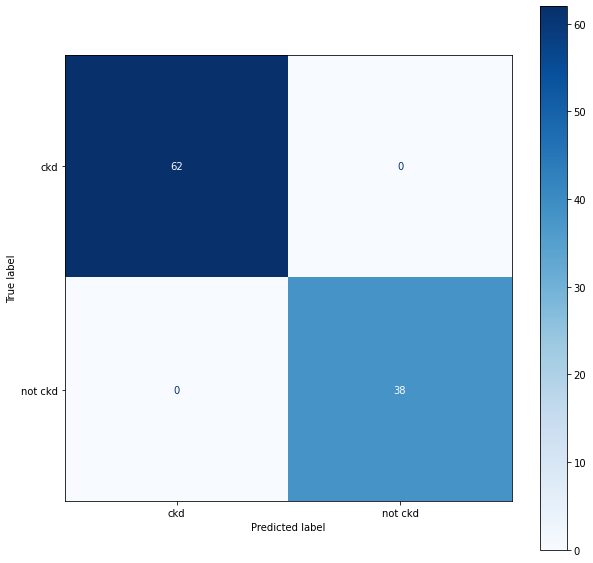

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

md = Model(ada,"AdaBoostClassifier",X_train,y_train,X_test,y_test)
ada_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### GradientBoostingClassifier

******************~ GradientBoostingClassifier ~**********************

Training Accuracy of GradientBoostingClassifier is 1.0
Test cross-validation Accuracy of GradientBoostingClassifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



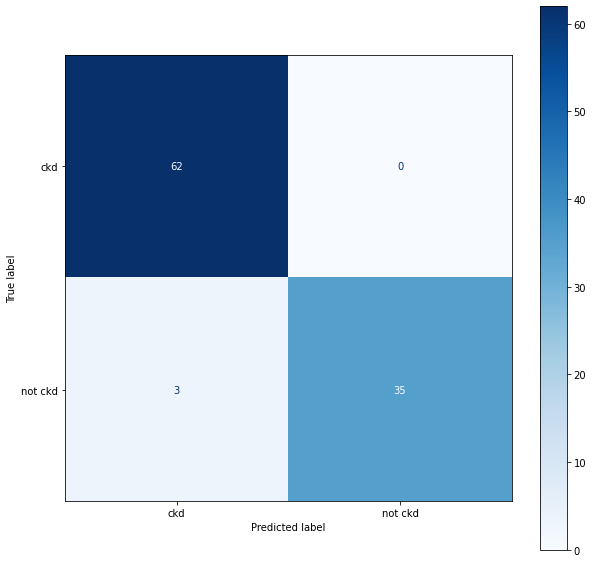

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()


md = Model(gb,"GradientBoostingClassifier",X_train,y_train,X_test,y_test)
gb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

******************~ GradientBoostingClassifier with param ~**********************

Training Accuracy of GradientBoostingClassifier with param is 1.0
Test cross-validation Accuracy of GradientBoostingClassifier with param is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



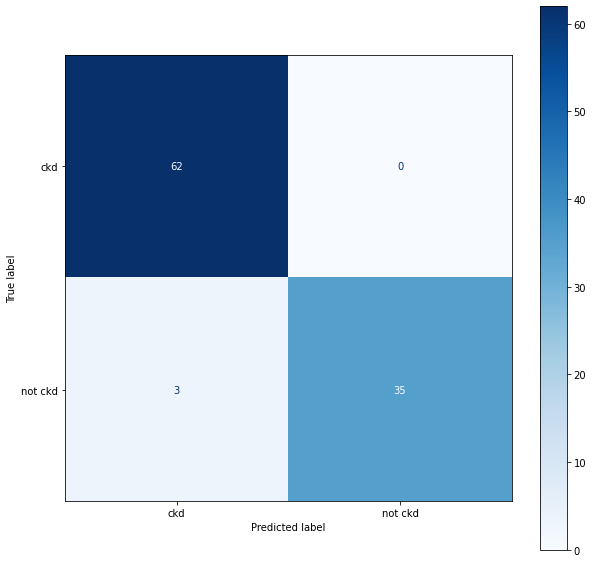

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)

md = Model(sgb,"GradientBoostingClassifier with param",X_train,y_train,X_test,y_test)
sgb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### XGBClassifier

******************~ xgboost ~**********************

Training Accuracy of xgboost is 1.0
Test cross-validation Accuracy of xgboost is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



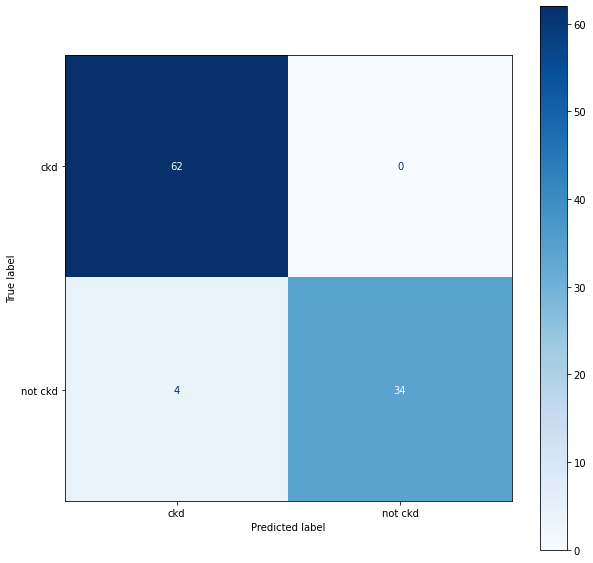

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 200)

# accuracy score, confusion matrix and classification report of xgboost

md = Model(xgb,"xgboost",X_train,y_train,X_test,y_test)
xgb_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.462955
0:	learn: 0.2382036	total: 3.89ms	remaining: 35ms
1:	learn: 0.1161612	total: 8.84ms	remaining: 35.3ms
2:	learn: 0.0672727	total: 11.3ms	remaining: 26.4ms
3:	learn: 0.0506016	total: 13.7ms	remaining: 20.6ms
4:	learn: 0.0365406	total: 16.3ms	remaining: 16.3ms
5:	learn: 0.0284560	total: 19.1ms	remaining: 12.8ms
6:	learn: 0.0227218	total: 22ms	remaining: 9.42ms
7:	learn: 0.0189040	total: 24.8ms	remaining: 6.19ms
8:	learn: 0.0148724	total: 27.6ms	remaining: 3.07ms
9:	learn: 0.0129497	total: 30.5ms	remaining: 0us


******************~ CatBoost ~**********************

Training Accuracy of CatBoost is 1.0
Test cross-validation Accuracy of CatBoost is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.97      0.92      0.95        38

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



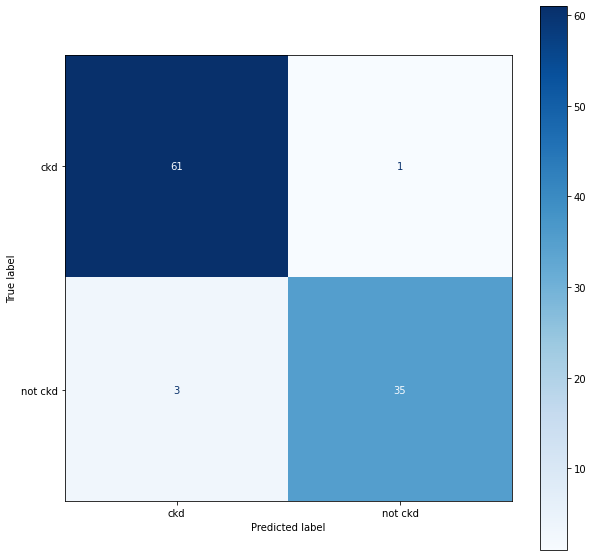

In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

md = Model(cat,"CatBoost",X_train,y_train,X_test,y_test,fitted=True)
cat_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### ExtraTreesClassifier

******************~ ExtraTreesClassifier ~**********************

Training Accuracy of ExtraTreesClassifier is 1.0
Test cross-validation Accuracy of ExtraTreesClassifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.92      0.96        38

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix :- 



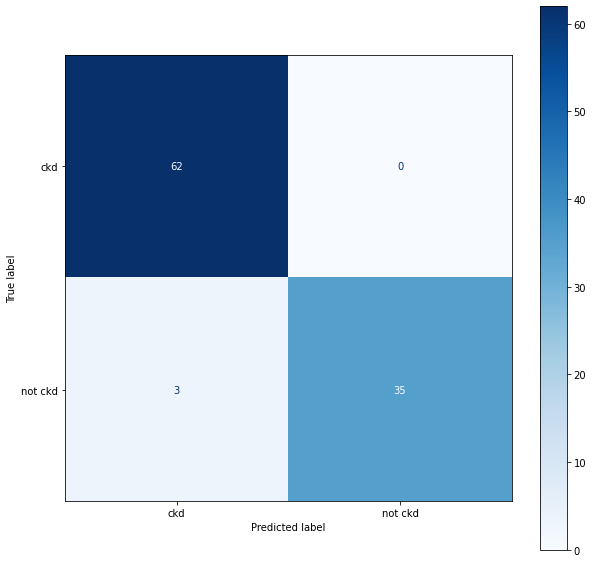

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
md = Model(etc,"ExtraTreesClassifier",X_train,y_train,X_test,y_test)
etc_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### LGBMClassifier

******************~ ExtraTreesClassifier ~**********************

Training Accuracy of ExtraTreesClassifier is 1.0
Test cross-validation Accuracy of ExtraTreesClassifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.89      0.94        38

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix :- 



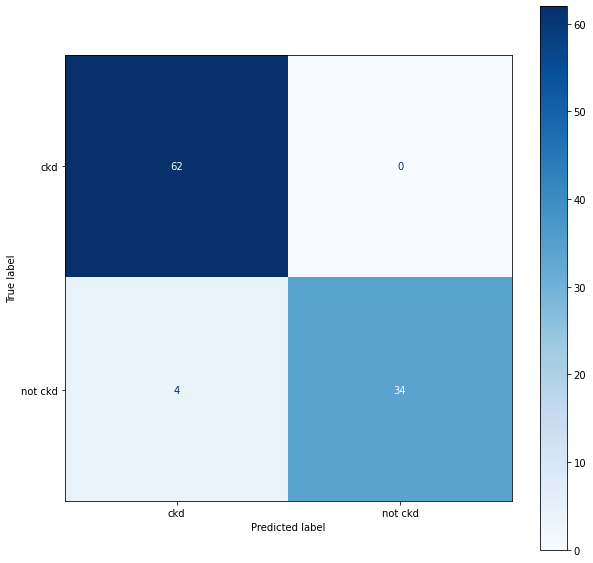

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.4)

# accuracy score, confusion matrix and classification report of lgbm classifier

md = Model(lgbm,"ExtraTreesClassifier",X_train,y_train,X_test,y_test)
lgbm_acc = md.accuracy()
md.summary()
md.confusion_matrix()

## Performance with Smote

In [ ]:
modelswithSmote = pd.DataFrame({
    'Model' : [ 'KNN',"LogisticRegression"  , "Support vector machine"  ,
               "SVM Sigmoid Kernel","SVM GaussianRBF","SVM Poly Kernel",
               "SVM Linear Kernel", "Gaussian Naive Bayes" , 'Decision Tree Classifier',
               'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
              'XgBoost', 'Cat Boost', 'Extra Trees Classifier','StackingClassifier','HistGradientBoostingClassifier',
               'MLPClassifier'],
    'Score' : [knn_acc, reg_acc, svc_acc,svs_acc,svr_acc,svp_acc,svl_acc, gnb_acc, dtc_acc, rd_clf_acc,
               ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc,sc_acc,
               hgd_acc,mlp_acc]
})

modelswithSmote.sort_values(by = 'Score', ascending = False)

,Model,Score
10,Ada Boost Classifier,1.00
1,LogisticRegression,0.99
0,KNN,0.98
7,Gaussian Naive Bayes,0.98
18,MLPClassifier,0.98
5,SVM Poly Kernel,0.97
6,SVM Linear Kernel,0.97
4,SVM GaussianRBF,0.97
8,Decision Tree Classifier,0.97
2,Support vector machine,0.97


In [ ]:
import plotly.express as px
modelswithSmote_sorted = modelswithSmote.sort_values(by = 'Score', ascending = True)
px.bar(data_frame = modelswithSmote_sorted, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

In [ ]:
mds = models.merge(modelswithSmote,
                        left_on=['Model'],
                        right_on=['Model'],
                   suffixes=('_withoutSmote', '_withSmote'))
mds["WhoBetter"] = mds.apply(lambda x: "With Smote" if x.Score_withoutSmote<x.Score_withSmote else  ("Same" if x.Score_withoutSmote==x.Score_withSmote  else "Without"), axis=1)
mds["best_score"] = mds.apply(lambda x: x.Score_withSmote if x.Score_withoutSmote<x.Score_withSmote else x.Score_withoutSmote, axis=1)
mds

,Model,Score_withoutSmote,Score_withSmote,WhoBetter,best_score
0,KNN,0.99,0.98,Without,0.99
1,LogisticRegression,0.99,0.99,Same,0.99
2,Support vector machine,0.97,0.97,Same,0.97
3,SVM Sigmoid Kernel,0.86,0.83,Without,0.86
4,SVM GaussianRBF,0.97,0.97,Same,0.97
5,SVM Poly Kernel,0.97,0.97,Same,0.97
6,SVM Linear Kernel,0.97,0.97,Same,0.97
7,Gaussian Naive Bayes,0.98,0.98,Same,0.98
8,Decision Tree Classifier,0.94,0.97,With Smote,0.97
9,Random Forest Classifier,0.96,0.97,With Smote,0.97


In [ ]:
best = mds.sort_values(by = 'best_score', ascending = False)
best.head(5)

,Model,Score_withoutSmote,Score_withSmote,WhoBetter,best_score
10,Ada Boost Classifier,0.99,1.00,With Smote,1.00
0,KNN,0.99,0.98,Without,0.99
1,LogisticRegression,0.99,0.99,Same,0.99
7,Gaussian Naive Bayes,0.98,0.98,Same,0.98
18,MLPClassifier,0.98,0.98,Same,0.98


## Feature selection

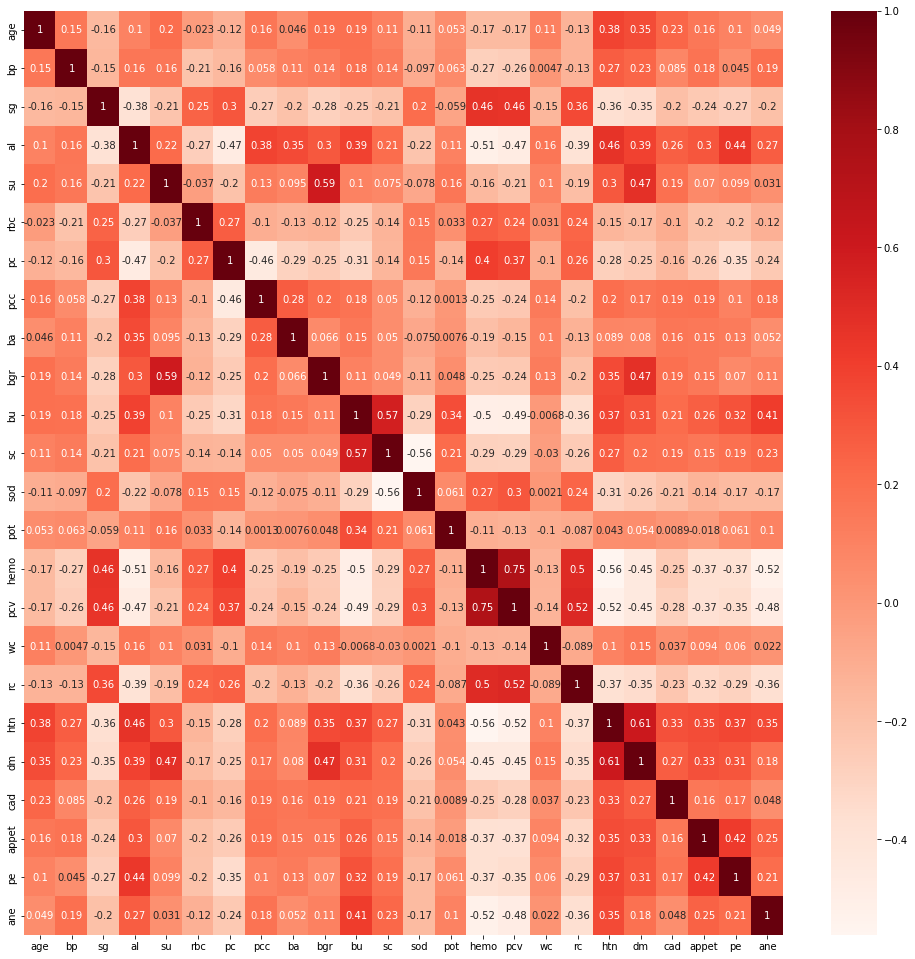

In [ ]:
plt.figure(figsize=(17,17))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
upper

<ipython-input-129-f61ae9766589>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,NaN,0.154475,-0.161926,0.101376,0.200710,-0.023078,-0.118024,0.161181,0.046437,0.192556,...,-0.166988,-0.166625,0.112093,-0.132981,0.380726,0.345443,0.232984,0.156181,0.102265,0.049408
bp,NaN,NaN,-0.151192,0.159015,0.157057,-0.208541,-0.161240,0.058042,0.110230,0.136404,...,-0.274644,-0.262849,0.004693,-0.130513,0.271843,0.231732,0.084849,0.175843,0.044888,0.190074
sg,NaN,NaN,NaN,-0.382713,-0.214760,0.248702,0.300556,-0.268200,-0.203878,-0.280732,...,0.461835,0.456471,-0.148737,0.359489,-0.362546,-0.346705,-0.195256,-0.240791,-0.270853,-0.196823
al,NaN,NaN,NaN,NaN,0.218920,-0.272146,-0.465963,0.378904,0.347884,0.296388,...,-0.509570,-0.471826,0.162811,-0.387192,0.458257,0.387838,0.264323,0.300989,0.436912,0.273343
su,NaN,NaN,NaN,NaN,NaN,-0.036602,-0.203592,0.132955,0.094572,0.594155,...,-0.163311,-0.213494,0.099918,-0.187932,0.295882,0.472126,0.191825,0.069625,0.098831,0.030766
rbc,NaN,NaN,NaN,NaN,NaN,NaN,0.269215,-0.104356,-0.134732,-0.122854,...,0.273680,0.241567,0.030683,0.241133,-0.146322,-0.174174,-0.103742,-0.196057,-0.204029,-0.117790
pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.456083,-0.287606,-0.252010,...,0.404929,0.366127,-0.100814,0.258453,-0.279018,-0.249229,-0.155352,-0.256220,-0.345222,-0.239661
pcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275082,0.198000,...,-0.245065,-0.237179,0.140224,-0.201077,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861
ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065553,...,-0.191089,-0.152189,0.104733,-0.126213,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208
bgr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.248444,-0.238513,0.129475,-0.200795,0.350291,0.469673,0.190404,0.146609,0.070323,0.107636


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
print(to_drop)

[]


In [ ]:
df = df.drop(to_drop, axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.777778,0.231405,0.525424,1,1,0,0,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.158120,...,0.644444,0.157025,0.220339,0,0,0,0,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.488889,0.219008,0.000000,0,1,0,1,0,1,0
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.511111,0.185950,0.305085,1,0,0,1,1,1,0
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.577778,0.210744,0.423729,0,0,0,0,0,0,0


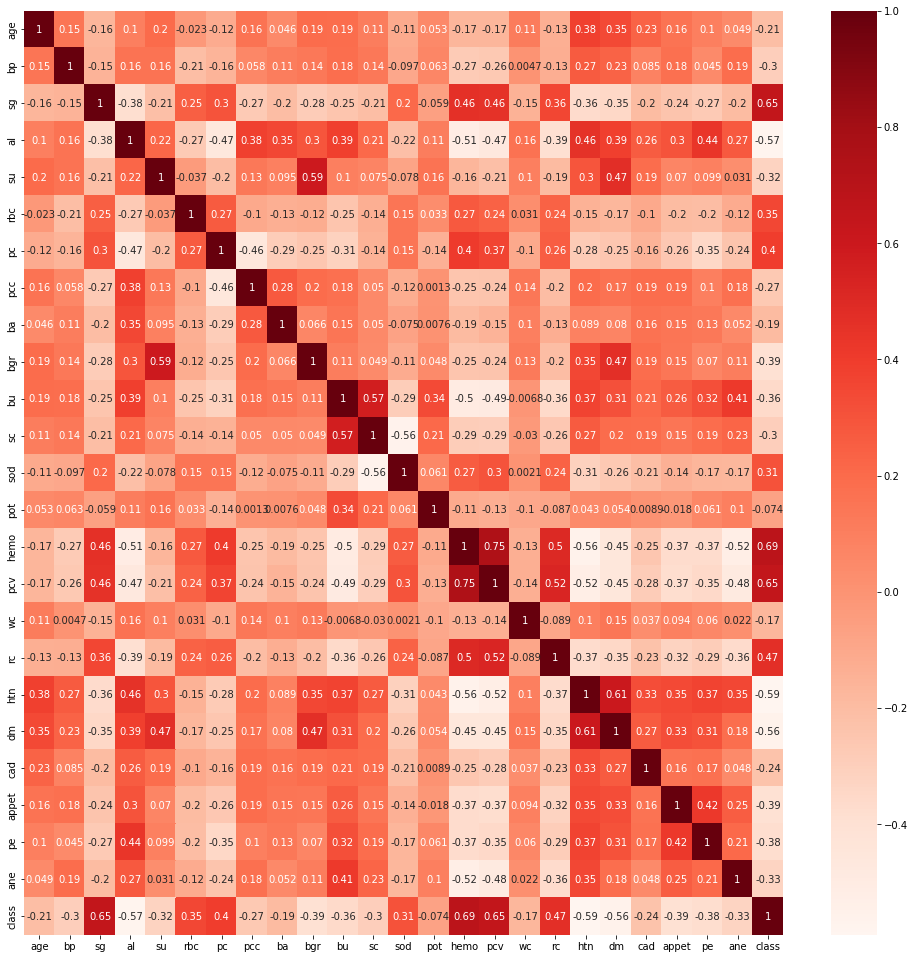

In [ ]:
plt.figure(figsize=(17,17))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.39]
relevant_features

sg       0.646755
al       0.573639
pc       0.395720
bgr      0.392476
hemo     0.686008
pcv      0.646812
rc       0.466033
htn      0.590438
dm       0.559060
appet    0.393341
class    1.000000
Name: class, dtype: float64

In [ ]:
len(relevant_features)

11

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.836735,0.777778,0.231405,0.525424,1,1,0,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.158120,...,0.557823,0.644444,0.157025,0.220339,0,0,0,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.442177,0.488889,0.219008,0.000000,0,1,0,1,0,1
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.551020,0.511111,0.185950,0.305085,1,0,0,1,1,1
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.578231,0.577778,0.210744,0.423729,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1,1,0,0,0.252137,...,0.857143,0.844444,0.185950,0.474576,0,0,0,0,0,0
396,0.454545,0.153846,1.00,0.0,0.0,1,1,0,0,0.113248,...,0.911565,1.000000,0.231405,0.694915,0,0,0,0,0,0
397,0.113636,0.230769,0.75,0.0,0.0,1,1,0,0,0.166667,...,0.863946,0.888889,0.181818,0.559322,0,0,0,0,0,0
398,0.170455,0.076923,1.00,0.0,0.0,1,1,0,0,0.196581,...,0.755102,0.933333,0.206612,0.644068,0,0,0,0,0,0


In [ ]:
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=1)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
impor_feat = X.columns[rfe.support_]
print(X.columns[rfe.support_])
print(rfe.ranking_)

Index(['hemo'], dtype='object')
[22 14  2  3 13  8  9 16 20 12 19 17 21 24  1  4 18 11  7  5 23  6 10 15]


In [ ]:
feature_ranking = pd.DataFrame({"features":X.columns,"Importance":rfe.ranking_})
feature_ranking

,features,Importance
0,age,22
1,bp,14
2,sg,2
3,al,3
4,su,13
5,rbc,8
6,pc,9
7,pcc,16
8,ba,20
9,bgr,12


In [ ]:
f_sorted = feature_ranking.sort_values(by = 'Importance', ascending = False)
f_sorted.head(10)

,features,Importance
13,pot,24
20,cad,23
0,age,22
12,sod,21
8,ba,20
10,bu,19
16,wc,18
11,sc,17
7,pcc,16
23,ane,15


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/s

Text(0, 0.5, 'Score')

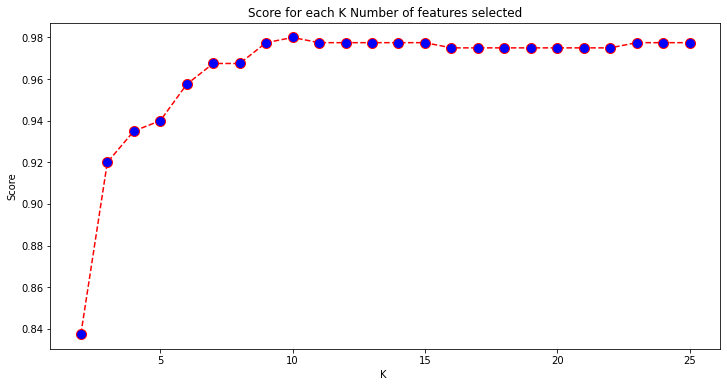

In [ ]:
score = []
lg = LogisticRegression()
scores = cross_val_score(lg, X, y, cv=10)
score.append(np.mean(scores))
new_x = X.copy()
for idx,row in f_sorted.iterrows():
    new_x = new_x.drop(row.features,axis=1)
    scores = cross_val_score(lg, new_x, y, cv=10)
    score.append(np.mean(scores))
plt.figure(figsize=(12, 6))
score.reverse()
plt.plot(range(1, 26), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each K Number of features selected')
plt.xlabel('K ')
plt.ylabel('Score')

In [ ]:
feat_imp = f_sorted.tail(10).features.values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train = X_train[feat_imp]
X_test = X_test[feat_imp]

### AdaBoost FS

******************~ AdaBoostClassifier ~**********************

Training Accuracy of AdaBoostClassifier is 1.0
Test cross-validation Accuracy of AdaBoostClassifier is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix :- 



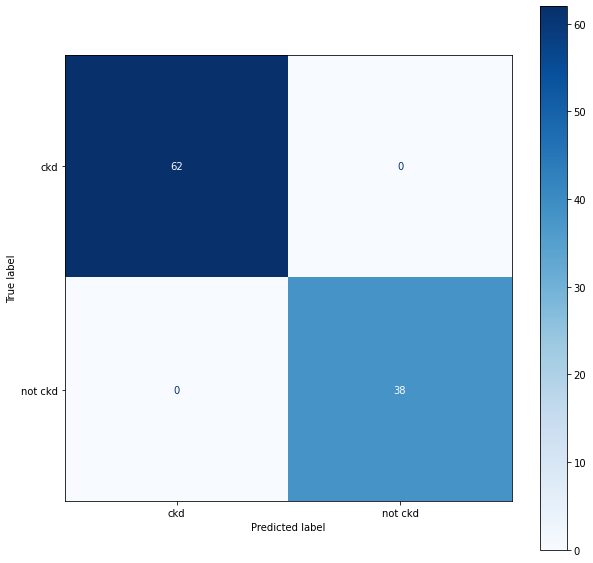

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

md = Model(ada,"AdaBoostClassifier",X_train,y_train,X_test,y_test)
ada_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### KNN

******************~ KNN ~**********************

Training Accuracy of KNN is 1.0
Test cross-validation Accuracy of KNN is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix :- 



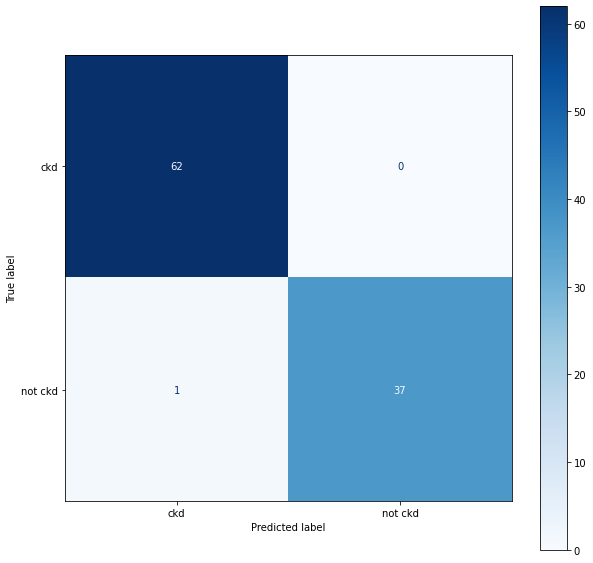

In [ ]:
knn = KNeighborsClassifier(2,metric='manhattan')

md = Model(knn,"KNN",X_train,y_train,X_test,y_test)
knn_acc = md.accuracy()
md.summary()
md.confusion_matrix()

### Logistic regression

******************~ Logistic Regression ~**********************

Training Accuracy of Logistic Regression is 0.9833333333333333
Test cross-validation Accuracy of Logistic Regression is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix :- 



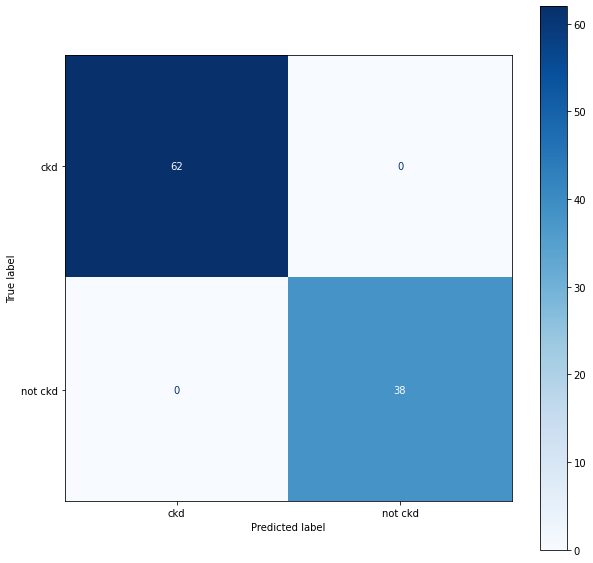

In [ ]:
lg = LogisticRegression()

md = Model(lg,"Logistic Regression",X_train,y_train,X_test,y_test)
lg_acc = md.accuracy()
md.summary()
md.confusion_matrix()

To conclude or research we found out that to get the best possible and trustworthy results we should use 10 features + Smote to avoid the data imbalance.




Thanks for Reading!